In [1]:
import pandas as pd
from pycaret.regression import *

In [2]:
train_data = pd.read_csv("train_test_data/train_data.csv")
train_data.head()

,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_0,num_7,num_36,...,num_32,num_30,num_50,num_14,num_37,num_46,num_12,num_18,num_16,target
0,363500,54,8,682,4,1325,2,11.677298,0.0,11.8748,...,147.0,1.0,66.0,112552.0,152.0,1.000000,1.000000,1.000000,1,7.223350
1,77605,68,8,682,4,1334,2,NaN,0.0,0.0000,...,203.0,1.0,33.0,86131.0,234.0,1.000000,1.000000,1.000000,1,0.000000
2,23410,205,8,682,4,1276,3,NaN,0.0,0.0000,...,168.0,1.0,46.0,112968.0,163.0,1.000000,1.000000,1.000000,1,0.000000
3,119647,205,14,891,4,2964,2,NaN,0.0,0.0000,...,-1.0,0.0,3.0,279.0,-1.0,0.000000,0.000000,0.000000,1,0.000000
4,230755,207,0,682,0,1366,2,NaN,0.0,0.0000,...,143.0,1.0,22.0,86052.0,191.0,0.121375,0.123628,0.146802,0,3.765352


In [3]:
test_data = pd.read_csv("train_test_data/test_data.csv")
test_data.head()

,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_0,num_7,num_36,...,num_29,num_32,num_30,num_50,num_14,num_37,num_46,num_12,num_18,num_16
0,156919,70,6,682,4,1330,2,11.664525,15.107867,0.0,...,-1.0,183.0,1.0,40.0,21847.0,277.0,1.000000,1.000000,1.000000,1
1,114562,100,8,324,4,2301,2,NaN,0.000000,0.0,...,-1.0,131.0,1.0,20.0,1073.0,132.0,1.000000,1.000000,1.000000,1
2,311422,52,14,366,4,4307,2,NaN,0.000000,0.0,...,-1.0,199.0,1.0,11.0,810.0,201.0,0.000000,0.000000,0.000000,0
3,346476,52,0,366,0,4287,2,2.862260,3.590824,0.0,...,-1.0,170.0,1.0,20.0,37779.0,156.0,1.000000,1.000000,0.082003,0
4,86921,52,8,682,4,1351,2,NaN,0.000000,0.0,...,-1.0,676.0,1.0,34.0,162772.0,264.0,0.412376,0.417917,0.448304,1


In [4]:
# Определение категориальных и числовых переменных
# Разделю, т.к. видела на этапе EDA ряд особенностей по колонкам и представлю для pycaret в удобном виде
cat_cols = [col for col in train_data.columns if col.startswith('cat_')]
num_cols = [col for col in train_data.columns if col.startswith('num_')]


Параметры для инициализации:

 - categorical_features=cat_cols - указывает список столбцов, которые следует рассматривать как категориальные переменные. Это список имен столбцов, начинающихся с префикса cat_, которые являются категориальными. PyCaret автоматически определяет типы переменных, но явное указание категориальных переменных может улучшить процесс обработки, особенно если в данных присутствуют столбцы с числовыми значениями, которые фактически являются категориальными.

 - numeric_features=num_cols - указывает список столбцов, которые следует рассматривать как числовые переменные. Это список имен столбцов, начинающихся с префикса num_, которые являются числовыми. Хотя PyCaret обычно правильно распознает числовые переменные, явное указание может быть полезным для избежания ошибок при наличии столбцов с числовыми данными, но не являющихся числовыми признаками (например, идентификаторы).

 - session_id=123 - устанавливает фиксированный random_state для обеспечения воспроизводимости результатов и мне это потребуется для последующих экспериментов.

 - silent=True - автоматически принимает все стандартные параметры и избегает интерактивных запросов во время настройки. 

 - normalize=True - включает нормализацию числовых признаков. Зачем? Улучшает производительность моделей, особенно тех, которые чувствительны к масштабу данных (например, линейная регрессия, SVM).


 - transformation=True - для приведения данных к нормальному распределению. Помогает улучшить линейные отношения между признаками и целевой переменной, что может повысить эффективность моделей.


 - handle_unknown_categorical=True - определяет, как обрабатывать неизвестные категории в категориальных признаках. Избегает ошибок при работе с новыми категориями и улучшает обобщающую способность модели.


 - unknown_categorical_method='most_frequent' - определяет метод замены неизвестных категорий. Позволяет контролировать, как модель будет обращаться с новыми или редкими категориями, что может повлиять на предсказательную способность. 'most_frequent': заменяет неизвестные категории на наиболее частую категорию в соответствующем признаке. Другие варианты: 'least_frequent', 'random', и т.д.


 - imputation_type='iterative' - Выбирает тип импутации пропущенных значений. 'iterative': Использует итеративную импутацию, такую как Multivariate Imputation by Chained Equations (MICE), которая предсказывает пропущенные значения на основе других признаков. Другие варианты: 'simple' (простая импутация, например, среднее или мода), 'knn', и т.д.


 - remove_multicollinearity=True - Включает удаление мультиколлинеарных признаков. Избегает проблем, связанных с мультиколлинеарностью, которые могут ухудшить производительность моделей и интерпретируемость коэффициентов. PyCaret автоматически удаляет признаки, которые сильно коррелируют между собой (скорость корреляции выше заданного порога). Отсюда multicollinearity_threshold=0.95 - устанавливает порог корреляции для определения мультиколлинеарности. Если абсолютная корреляция между двумя признаками превышает 0.95, один из них будет удалён.


In [5]:
# Инициализация среды PyCaret


s = setup(data=train_data,
                  target='target',
                  categorical_features=cat_cols,
                  numeric_features=num_cols,
                  session_id=123)
                  # normalize=True,                 
                  # transformation=True,
                  # normalization_method='zscore',
                  #transformation_method='yeo-johnson',
                  # silent=True,
                  # #handle_unknown_categorical=True,
                  # #unknown_categorical_method='most_frequent',
                  # imputation_type='iterative',
                  # remove_multicollinearity=True,
                  # multicollinearity_threshold=0.95)

,Description,Value
0,Session id,123
1,Target,target
2,Target type,Regression
3,Original data shape,"(145906, 63)"
4,Transformed data shape,"(145906, 90)"
5,Transformed train set shape,"(102134, 90)"
6,Transformed test set shape,"(43772, 90)"
7,Numeric features,55
8,Categorical features,6
9,Rows with missing values,97.8%


In [6]:
# Пройдем по алгоритмам и снимем метрики
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.3059,33.7690,5.7721,0.3684,0.5996,0.8032,0.5490
ridge,Ridge Regression,1.3055,33.7686,5.7720,0.3684,0.5994,0.8029,0.1890
br,Bayesian Ridge,1.3039,33.7897,5.7738,0.3681,0.5978,0.8009,0.4990
en,Elastic Net,1.2576,34.2308,5.8149,0.3578,0.5868,0.7389,1.8910
gbr,Gradient Boosting Regressor,1.0869,34.6162,5.8392,0.3566,0.4781,0.8350,7.2990
lightgbm,Light Gradient Boosting Machine,1.0778,34.6254,5.8438,0.3555,0.4792,0.8241,0.4640
llar,Lasso Least Angle Regression,1.2604,34.3615,5.8267,0.3547,0.5921,0.7147,0.1900
lasso,Lasso Regression,1.2604,34.3615,5.8267,0.3547,0.5921,0.7147,0.9340
et,Extra Trees Regressor,1.1797,35.7167,5.9385,0.3329,0.5565,0.9083,10.8580
rf,Random Forest Regressor,1.1835,35.7068,5.9368,0.3328,0.5529,0.9101,30.1960


In [7]:
print(best_model)

LinearRegression(n_jobs=-1)


In [8]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

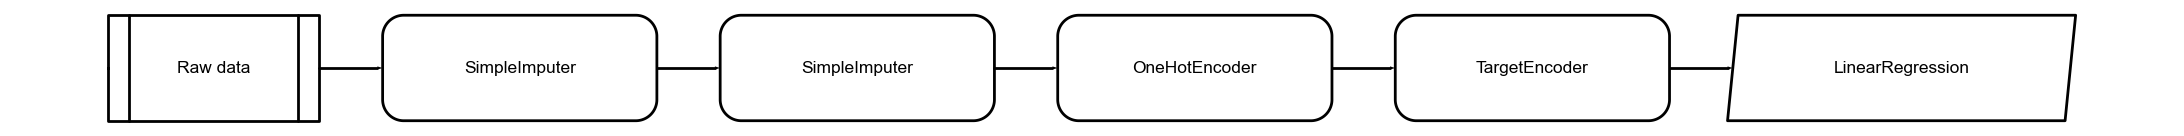

In [9]:
# Визуализация графиков
plot_model(best_model, plot = 'pipeline')


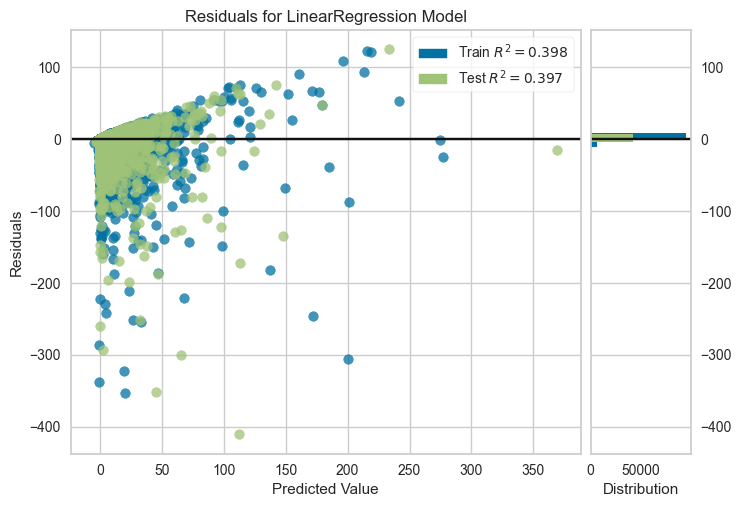

In [12]:
plot_model(best_model, plot = 'residuals')


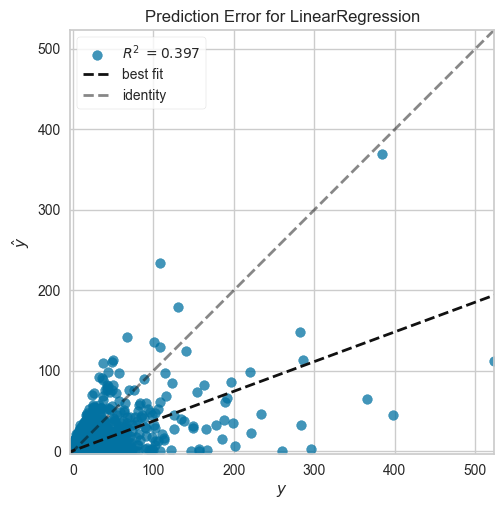

In [11]:
plot_model(best_model, plot = 'error')


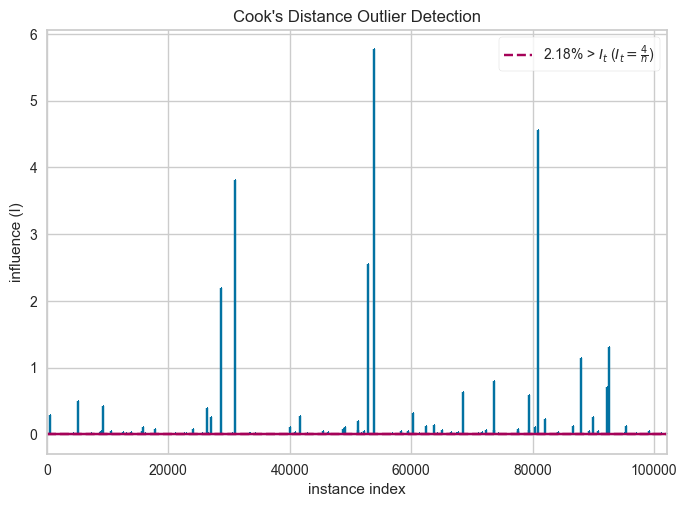

In [13]:
plot_model(best_model, plot = 'cooks')


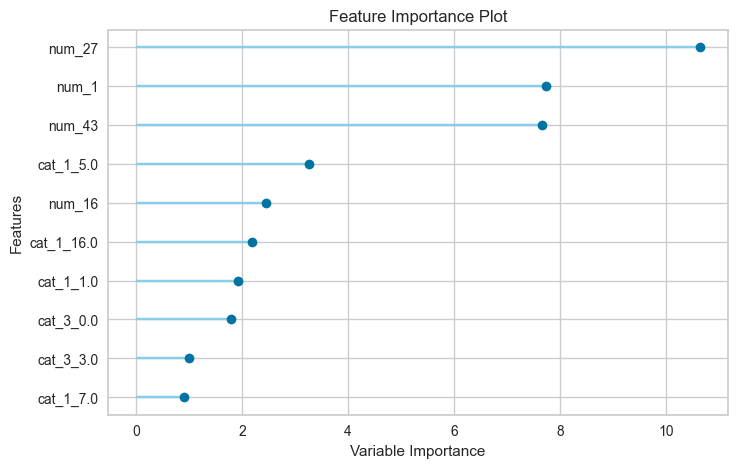

In [14]:
plot_model(best_model, plot = 'feature')


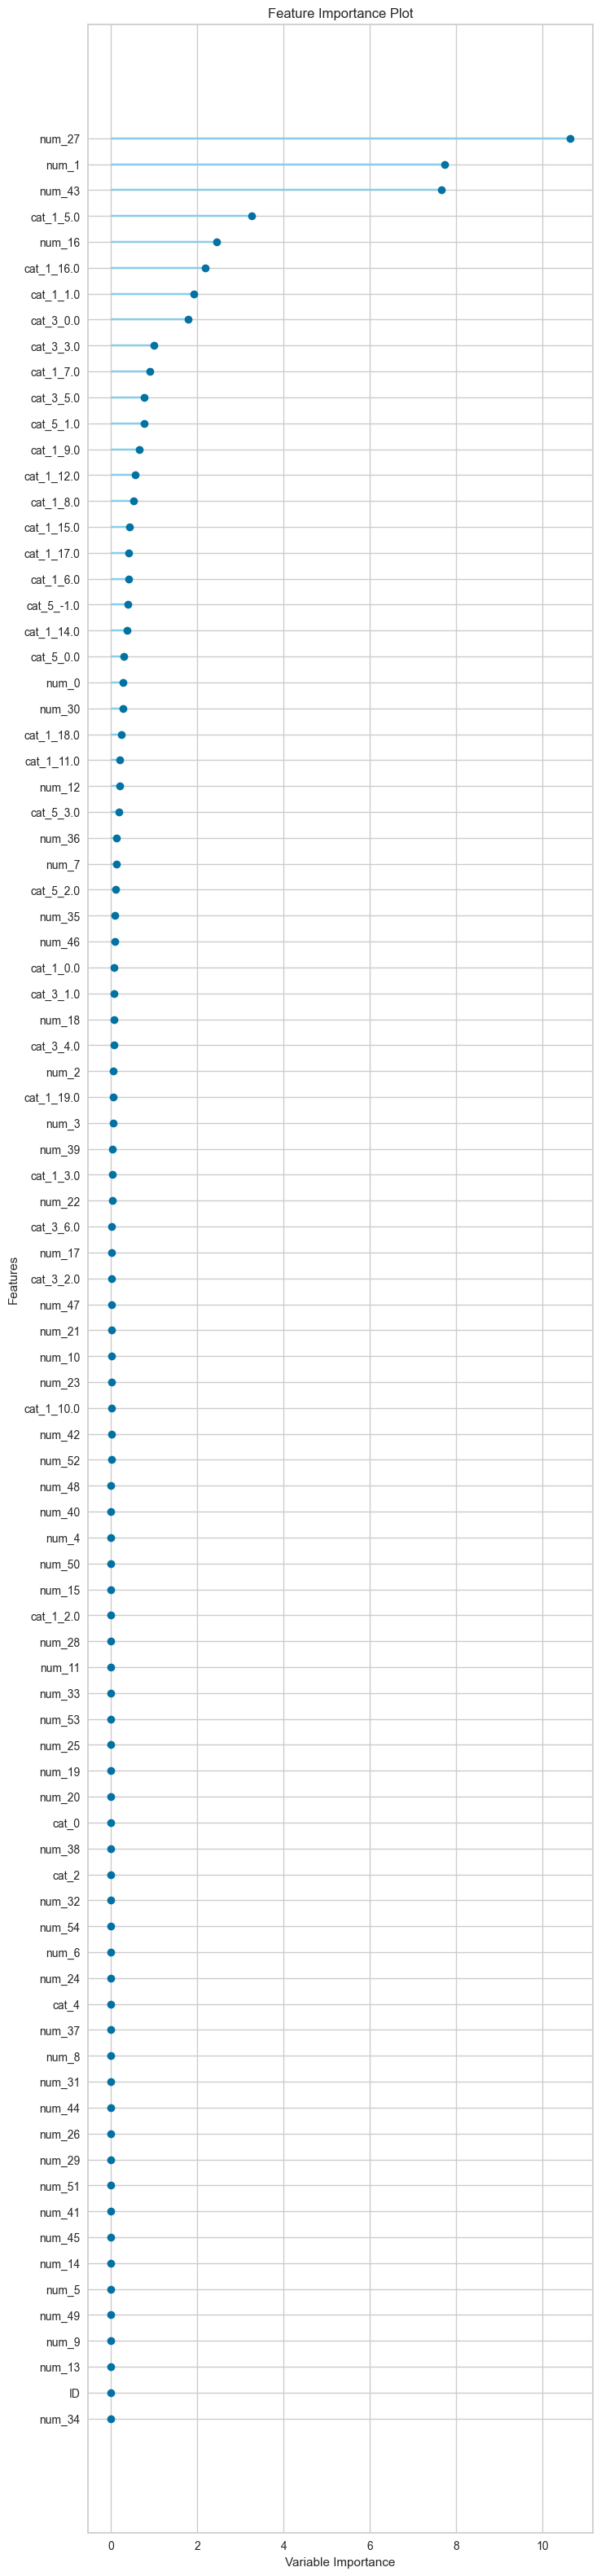

In [15]:
plot_model(best_model, plot = 'feature_all')


In [16]:
"""
'pipeline' - Схематическое изображение конвейера предварительной обработки данных (Schematic drawing of the preprocessing pipeline)
Диаграмма, отображающая последовательность шагов обработки данных и обучения модели.
Помогает визуализировать все этапы преобразования данных,
начиная от исходных данных и заканчивая обученной моделью.
Это включает в себя масштабирование, кодирование категориальных признаков,
отбор признаков и другие шаги предварительной обработки.

'residuals_interactive' - Интерактивные графики остатков (Interactive Residual plots)
Динамические графики, позволяющие взаимодействовать с визуализацией остатков модели.
Используются для глубокого анализа распределения остатков,
обнаружения аномалий и выявления паттернов,
которые могут указывать на проблемы с моделью (например, нелинейности или гетероскедастичность).

'residuals' - График остатков (Residuals Plot)
Статический график, отображающий разницу между фактическими значениями и предсказаниями модели.
Помогает оценить, насколько хорошо модель соответствует данным, и выявить систематические ошибки в предсказаниях.

'error' - График ошибки предсказания (Prediction Error Plot)
Визуализация, сравнивающая предсказанные значения модели с фактическими наблюдениями.
Позволяет оценить точность модели и выявить области, где модель может недооценивать или переоценивать результаты.

'cooks' -  График расстояний Кука (Cooks Distance Plot)
График, отображающий значение расстояния Кука для каждого наблюдения в данных.
Используется для обнаружения влиятельных наблюдений,
которые оказывают непропорциональное влияние на параметры модели.
Такие точки могут искажать результаты и требуют дополнительного внимания.

'rfe' - Рекурсивный отбор признаков (Recursive Feature Elimination)
Метод, последовательно удаляющий наименее значимые признаки для улучшения модели.
Помогает определить наиболее важные признаки, уменьшая сложность модели и потенциально повышая ее производительность.

'learning' - Кривая обучения (Learning Curve)
График, показывающий зависимость между размером обучающей выборки и качеством модели.
Оценивает, как модель обучается на разных объемах данных, и выявляет проблемы недообучения или переобучения.

'vc' - Кривая валидации (Validation Curve)
График, демонстрирующий влияние изменения значения гиперпараметра на качество модели.
Помогает в выборе оптимальных значений гиперпараметров для улучшения производительности модели.

'manifold' - Визуализация нелинейного снижения размерности (Manifold Learning)
Графическое отображение многомерных данных в двух- или трехмерном пространстве
с использованием методов нелинейного снижения размерности (например, t-SNE, Isomap).
Позволяет визуализировать структуру данных, выявлять скрытые закономерности и кластеры.

'feature' - Важность признаков (Feature Importance)
График, показывающий вклад каждого признака в предсказания модели.
Определяет наиболее значимые признаки, влияющие на результат модели, что может быть полезно для интерпретации и оптимизации модели.

'feature_all' - Важность всех признаков, полный список (Feature Importance (All))
 Расширенная версия графика важности признаков, включающая все используемые признаки.
 Предоставляет полный обзор влияния каждого признака, что полезно для детального анализа и отбора признаков.

'parameter' - Гиперпараметры модели (Model Hyperparameter)
Визуализация, отображающая влияние различных значений гиперпараметров на качество модели.
Помогает в процессе настройки гиперпараметров путем сравнения результатов модели при разных их значениях.

'tree' - Дерево решений (Decision Tree)
Графическое представление структуры дерева решений, используемого в модели.
Позволяет визуализировать пути принятия решений моделью, что облегчает интерпретацию и объяснение ее предсказаний.

"""

"\n'pipeline' - Схематическое изображение конвейера предварительной обработки данных (Schematic drawing of the preprocessing pipeline)\nДиаграмма, отображающая последовательность шагов обработки данных и обучения модели.\nПомогает визуализировать все этапы преобразования данных,\nначиная от исходных данных и заканчивая обученной моделью.\nЭто включает в себя масштабирование, кодирование категориальных признаков,\nотбор признаков и другие шаги предварительной обработки.\n\n'residuals_interactive' - Интерактивные графики остатков (Interactive Residual plots)\nДинамические графики, позволяющие взаимодействовать с визуализацией остатков модели.\nИспользуются для глубокого анализа распределения остатков,\nобнаружения аномалий и выявления паттернов,\nкоторые могут указывать на проблемы с моделью (например, нелинейности или гетероскедастичность).\n\n'residuals' - График остатков (Residuals Plot)\nСтатический график, отображающий разницу между фактическими значениями и предсказаниями модели.\n

In [17]:
predict_model(best_model)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,1.3545,42.7269,6.5366,0.3974,0.5985,0.8130


,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_0,num_7,num_36,...,num_30,num_50,num_14,num_37,num_46,num_12,num_18,num_16,target,prediction_label
19169,333092,207,0,365,0,4259,3,NaN,0.0,0.000000,...,1.000000,22.0,1268.0,117.0,1.000000,1.000000,1.000000,0,0.000000,-0.250244
95016,288124,96,6,682,2,1112,2,NaN,0.0,0.000000,...,0.000000,2.0,151.0,-1.0,0.000000,0.000000,0.000000,1,0.000000,0.633484
30473,101529,220,6,682,1,1105,2,NaN,0.0,0.000000,...,0.000000,4.0,388.0,-1.0,0.000000,0.000000,0.000000,1,0.000000,-0.611380
114672,268892,52,14,365,4,4286,3,NaN,0.0,0.000000,...,0.074316,34.0,72336.0,1544.0,0.108608,0.109234,0.111235,0,0.000000,4.030569
75228,228568,68,14,682,4,1393,3,NaN,0.0,0.000000,...,1.000000,30.0,137615.0,469.0,0.682887,0.685524,0.702822,0,0.000000,4.092794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76091,166859,179,0,365,0,4258,3,NaN,0.0,0.000000,...,0.000000,0.0,-1.0,-1.0,0.000000,0.000000,0.000000,0,0.000000,0.894830
6221,39708,196,6,682,2,1334,2,2.435683,0.0,3.607455,...,1.000000,64.0,61274.0,183.0,0.999291,0.999311,0.999363,1,2.819092,6.348615
84553,172825,207,0,366,0,4307,2,NaN,0.0,0.000000,...,0.000000,1.0,183.0,-1.0,0.000000,0.000000,0.000000,0,0.000000,0.611434
59079,149879,91,8,363,4,2227,2,NaN,0.0,0.000000,...,0.000000,4.0,250.0,-1.0,0.000000,0.000000,0.000000,1,0.000000,-0.587596


In [20]:
predictions = predict_model(best_model, data=test_data)
predictions.head()


,ID,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,num_0,num_7,num_36,...,num_32,num_30,num_50,num_14,num_37,num_46,num_12,num_18,num_16,prediction_label
0,156919,70,6,682,4,1330,2,11.664525,15.107867,0.0,...,183.0,1.0,40.0,21847.0,277.0,1.000000,1.000000,1.000000,1,9.027981
1,114562,100,8,324,4,2301,2,NaN,0.000000,0.0,...,131.0,1.0,20.0,1073.0,132.0,1.000000,1.000000,1.000000,1,-0.480269
2,311422,52,14,366,4,4307,2,NaN,0.000000,0.0,...,199.0,1.0,11.0,810.0,201.0,0.000000,0.000000,0.000000,0,2.214073
3,346476,52,0,366,0,4287,2,2.862260,3.590824,0.0,...,170.0,1.0,20.0,37779.0,156.0,1.000000,1.000000,0.082003,0,3.353963
4,86921,52,8,682,4,1351,2,NaN,0.000000,0.0,...,676.0,1.0,34.0,162772.0,264.0,0.412376,0.417917,0.448304,1,0.553421


In [21]:
save_model(best_model, 'best_pipeline')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['num_0', 'num_7', 'num_36',
                                              'num_2', 'num_24', 'num_27',
                                              'num_1', 'num_43', 'num_39',
                                              'num_10', 'num_23', 'num_40',
                                              'num_22', 'num_47', 'num_38',
                                              'num_17', 'num_35', 'num_3',
                                              'num_52', 'num_48', 'num_53',
                                              'num_28', 'num_4', 'num_21',
                                              'num_42', 'num_54', 'num_5',
                                              'num_34', 'num_6', 'nu...
                 ('onehot_encoding',
                  TransformerWrapper(include=['cat_1', 'cat_3', 'cat_5'],
                                     transformer=OneHotEncode

In [30]:
# Проверим структуру predictions
print(predictions.columns)

# Убедимся, что столбцы 'ID' и 'prediction_label' присутствуют
required_columns = ['ID', 'prediction_label']
for col in required_columns:
    if col not in predictions.columns:
        print(f"В predictions отсутствует столбец: {col}")

# Если столбцы присутствуют, сформируем результирующий DataFrame
if all(col in predictions.columns for col in required_columns):
    # Создание результирующего DataFrame с 'ID' и предсказанными значениями
    result = predictions[required_columns].copy()
    
    # Переименование столбца 'prediction_label' в более информативное название, если необходимо
    result.rename(columns={'prediction_label': 'Predicted_Target'}, inplace=True)
    
    # Проверка на наличие пропусков в 'ID'
    if result['ID'].isnull().any():
        print("В столбце 'ID' обнаружены пропуски. Их необходимо обработать перед сохранением.")
    else:
        # Сохранение результирующего DataFrame в CSV файл
        result.to_csv('predictions.csv', index=False, encoding='utf-8')
        print("Результирующий DataFrame успешно сохранён в 'predictions.csv'.")
else:
    print("Необходимые столбцы отсутствуют в predictions. Проверьте наличие 'ID' и 'prediction_label'.")

# Дополнительно: если столбец 'ID' отсутствует в predictions, но присутствует в test_data
if 'ID' not in predictions.columns and 'ID' in test_data.columns:
    # Предполагаем, что порядок строк в predictions совпадает с test_data
    result = pd.DataFrame({
        'ID': test_data['ID'],
        'Predicted_Target': predictions['Label']  # или 'prediction_label' в зависимости от версии PyCaret
    })
    
    # Сохранение в CSV
    result.to_csv('predictions.csv', index=False, encoding='utf-8')
    print("Результирующий DataFrame успешно сформирован и сохранён в 'predictions.csv'.")

Index(['ID', 'cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'num_0',
       'num_7', 'num_36', 'num_2', 'num_24', 'num_27', 'num_1', 'num_43',
       'num_39', 'num_10', 'num_23', 'num_40', 'num_22', 'num_47', 'num_38',
       'num_17', 'num_35', 'num_3', 'num_52', 'num_48', 'num_53', 'num_28',
       'num_4', 'num_21', 'num_42', 'num_54', 'num_5', 'num_34', 'num_6',
       'num_44', 'num_20', 'num_19', 'num_11', 'num_15', 'num_8', 'num_25',
       'num_33', 'num_45', 'num_51', 'num_31', 'num_49', 'num_26', 'num_13',
       'num_41', 'num_9', 'num_29', 'num_32', 'num_30', 'num_50', 'num_14',
       'num_37', 'num_46', 'num_12', 'num_18', 'num_16', 'prediction_label'],
      dtype='object')
Результирующий DataFrame успешно сохранён в 'predictions.csv'.


In [31]:
#ToDo
# Дополнительные идеи для улучшения модели:
# 1. Проведение более детального EDA для выявления скрытых зависимостей.
# 2. Инженерия признаков: создание новых признаков на основе существующих.
# 3. Тестирование ансамблевых моделей или моделей градиентного бустинга.
# 4. Настройка гиперпараметров выбранной модели для повышения качества.
# 5. Обработка несбалансированных данных, а таковые имеются.
# 6. MlFlow/tensorbord для визуализации хода обучения
# 7. Docker сервис для предсказания на модели

# И все это выходит за 8 часов работы))